## Observations and Insights 

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
plt.style.use('dark_background')

# Study data files
mouse_metadata_path = "data/mouse_metadata.csv"
study_results_path = "data/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [177]:

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [228]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [231]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid_timepoint = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouseid_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [229]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

In [230]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

249

## Summary Statistics

In [184]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
regiment_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_stats['variance'] = regiment_var
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
regimen_stats['SEM'] = regimen_sem

In [185]:
reg_stats = regimen_stats.drop(columns=['count','min','25%','75%','max'])
reg_final = reg_stats.rename(columns={'50%':'median','std':'standard deviation'})

In [186]:
reg_final = reg_final[['mean', 'median','variance','standard deviation','SEM']]
reg_final

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
reg_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std', 'sem']})
reg_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [188]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_regimen = clean_df['Drug Regimen'].value_counts()
regimen_count_df = pd.DataFrame(total_regimen)
regimen_count_df.rename(columns={'Drug Regimen':'Total'},inplace=True)
regimen_count_df.index.name = 'Drug Regimen' 
regimen_count_df

,Total
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178


Text(0, 0.5, 'Total')

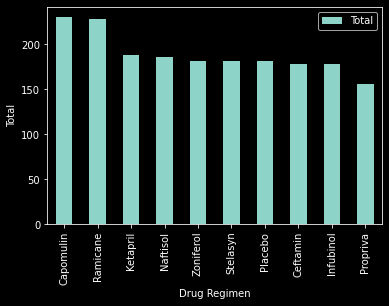

In [205]:
reg_bar = regimen_count_df.plot.bar(stacked=True)
reg_bar.set_ylabel('Total')

Text(0, 0.5, 'Total')

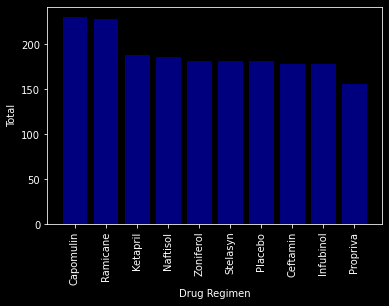

In [190]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = regimen_count_df.index
drug_total = regimen_count_df['Total'].values.tolist()
plt.bar(drug_regimen , drug_total, color ='b', alpha = 0.5, align = 'center')
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Total')

,Total
Gender,
Male,958
Female,930


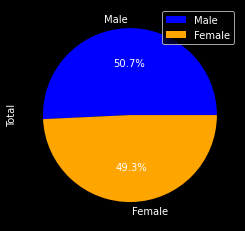

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = clean_df['Sex'].value_counts()
gend_dis = pd.DataFrame(gender_distribution)
gend_dis.rename(columns={'Sex':'Total'},inplace=True)
gend_dis.index.name = 'Gender' 
gend_pie = gend_dis.plot.pie(y='Total', stacked=True, autopct='%1.1f%%', colors = ['blue','orange'])
gend_dis

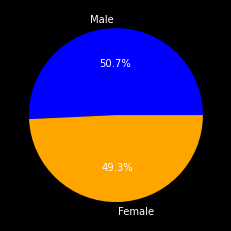

In [211]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = clean_df['Sex'].unique()
gender_count = gend_dis['Total'].values.tolist()
plt.pie(gender_count, labels = gender_label, autopct='%1.1f%%', colors = ['blue','orange'])

## Quartiles, Outliers and Boxplots

In [214]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_max = clean_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == clean_df['Timepoint']
clean_final = clean_df[volume_max]
clean_final['Drug Regimen'].unique()
clean_final = clean_final[~clean_final['Drug Regimen'].isin(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])]
clean_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [212]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merged_clean = pd.merge(clean_df, timepoint_max_df,how='inner', on='Mouse ID')
# merged_clean

# # Clean up the dataframe
# merged_final = merged_clean.drop(columns= ['Drug Regimen_y','Sex_y', 'Age_months_y', 'Weight (g)_y', 'Timepoint_y', 'Metastatic Sites_y'])
# merged_final.rename(columns={
#     'Drug Regimen_x':'Drug Regimen',
#     'Sex_x':'Sex',
#     'Age_months_x':'Age_months',
#     'Weight (g)_x':'Weight (g)',
#     'Timepoint_x': 'Timepoint',
#     'Tumor Volume (mm3)_x':'Tumor Volume (mm3)',
#     'Metastatic Sites_x':'Metastatic Sites',
#     'Tumor Volume (mm3)_y':'Tumor Volume at Last Timepoint'
# },inplace=True)
# merged_final

In [217]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ramicane     40.659006
Name: Tumor Volume (mm3), dtype: float64

In [220]:
q1 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)
q1

Drug Regimen
Capomulin    32.377357
Ceftamin     48.722078
Infubinol    54.048608
Ramicane     31.560470
Name: Tumor Volume (mm3), dtype: float64

In [222]:
q3 = clean_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75)
q3

Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ramicane     40.659006
Name: Tumor Volume (mm3), dtype: float64

In [225]:
IQR = q3 - q1 
IQR

Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ramicane      9.098537
Name: Tumor Volume (mm3), dtype: float64

In [196]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [197]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [198]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [199]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
